In [6]:
import pickle

In [7]:
# with open(
#     "/home/t.afanasyeva/deep_learning_anaemias/output/ResNet50V2_score.pkl", "rb"
# ) as file:
#     ResNet50V2_score = pickle.load(file)

# with open(
#     "/home/t.afanasyeva/deep_learning_anaemias/output/MobileNetV2_score.pkl", "rb"
# ) as file:
#     MobileNetV2_score = pickle.load(file)

# with open(
#     "/home/t.afanasyeva/deep_learning_anaemias/output/EfficientNetB0_score.pkl", "rb"
# ) as file:
#     EfficientNetB0_score = pickle.load(file)

In [8]:
with open(
    "/home/t.afanasyeva/deep_learning_anaemias/output/ResNet50V2_history.pkl", "rb"
) as file:
    ResNet50V2_history = pickle.load(file)

with open(
    "/home/t.afanasyeva/deep_learning_anaemias/output/MobileNetV2_history.pkl", "rb"
) as file:
    MobileNetV2_history = pickle.load(file)

with open(
    "/home/t.afanasyeva/deep_learning_anaemias/output/EfficientNetB0_history.pkl", "rb"
) as file:
    EfficientNetB0_history = pickle.load(file)
with open(
    "/home/t.afanasyeva/deep_learning_anaemias/output/InceptionV3_history.pkl", "rb"
) as file:
    InceptionV3_history = pickle.load(file)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_history(model_name, history, metrics):
    sns.lineplot(data=history[metrics[0]], label=metrics[0])
    sns.lineplot(data=history[metrics[1]], label=metrics[1])
    plt.xlabel("epochs")
    plt.ylabel("metric")
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    title = f"{model_name} {'Accuracy' if metrics[0] == 'accuracy' else 'Loss'}"
    plt.title(title)
    plt.savefig(
        f"/home/t.afanasyeva/deep_learning_anaemias/output/{model_name}_{metrics}_history.png",
        bbox_inches="tight",
    )
    plt.show()
    plt.close()

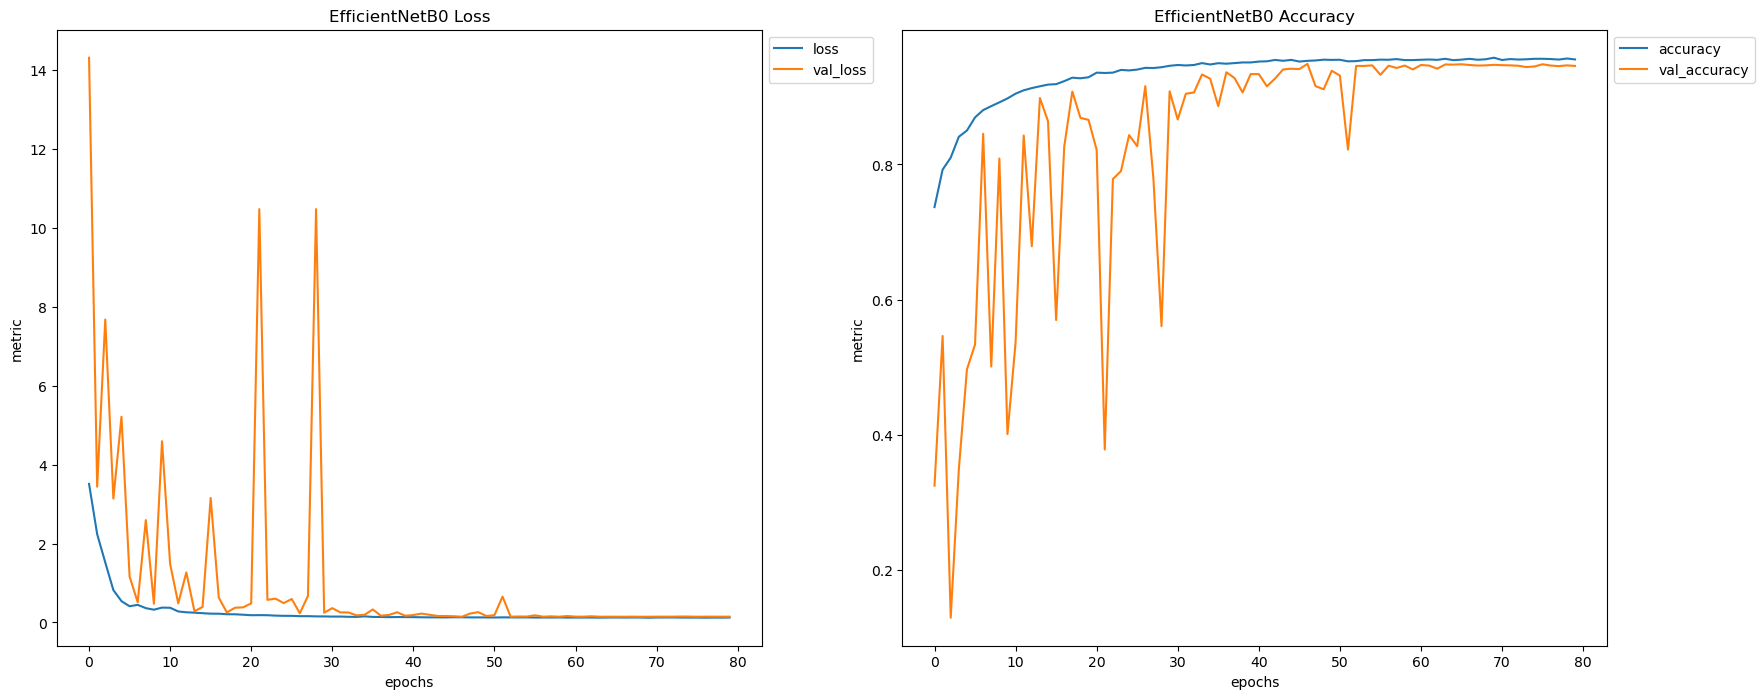

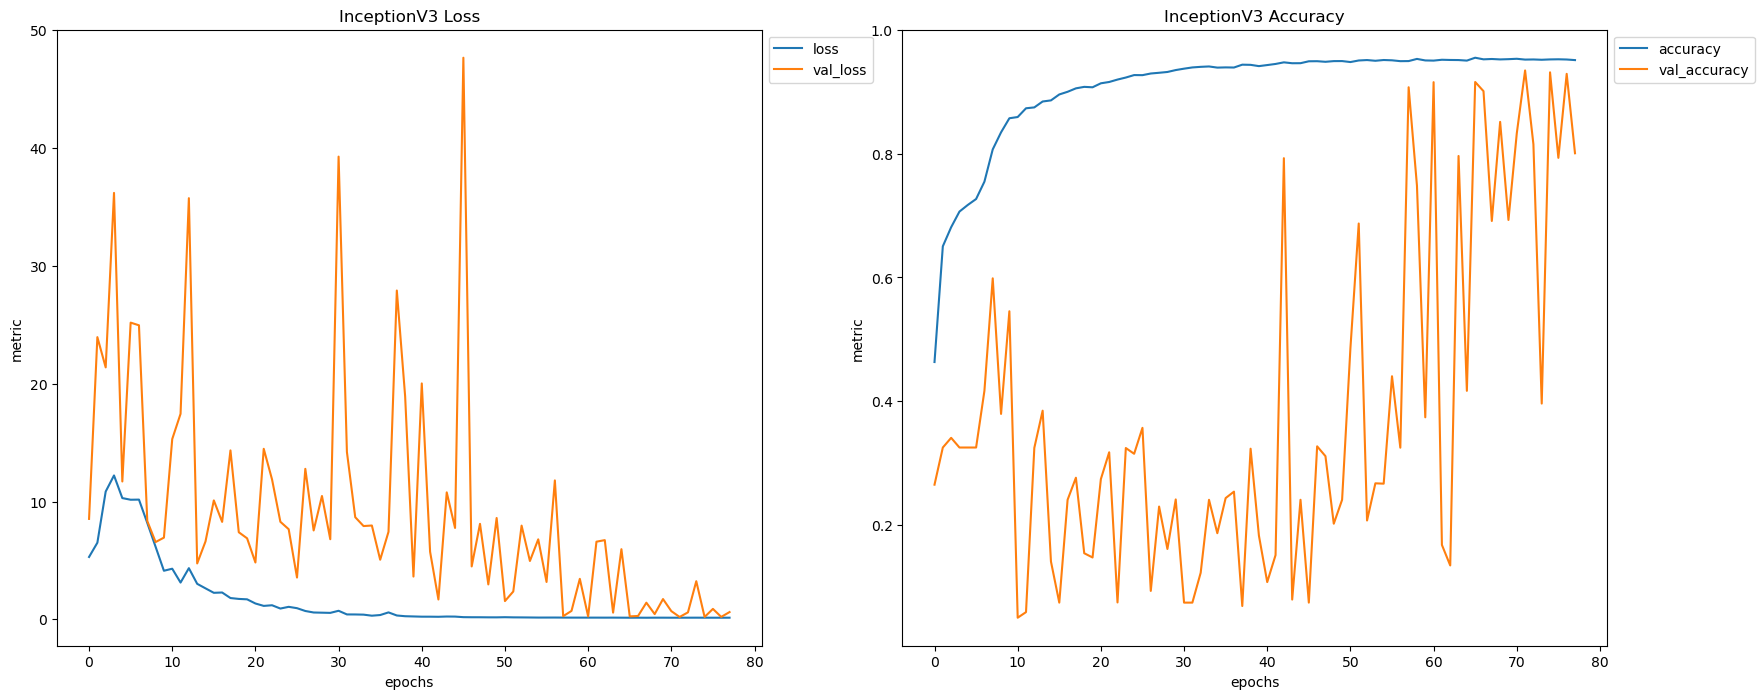

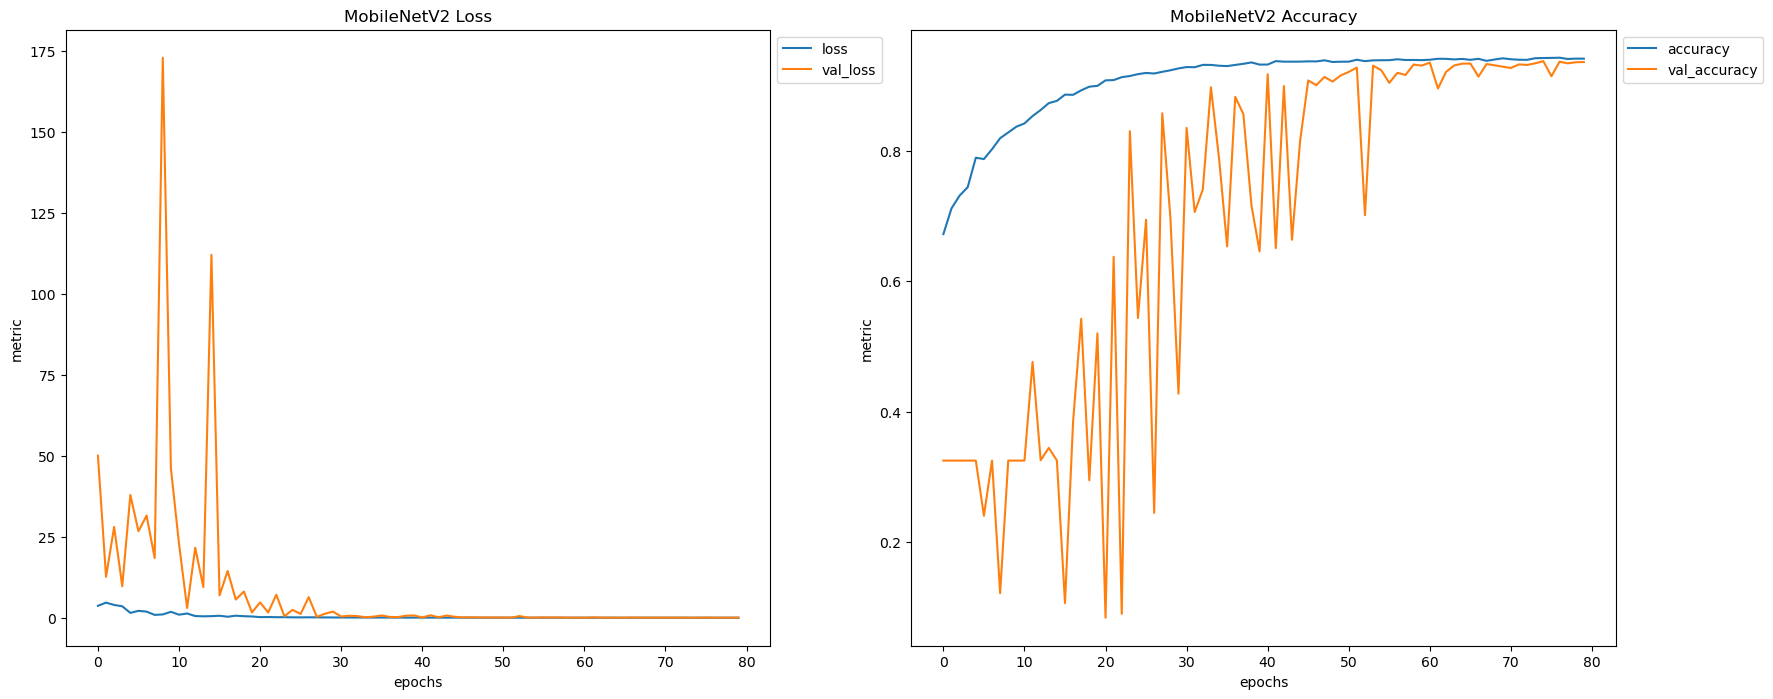

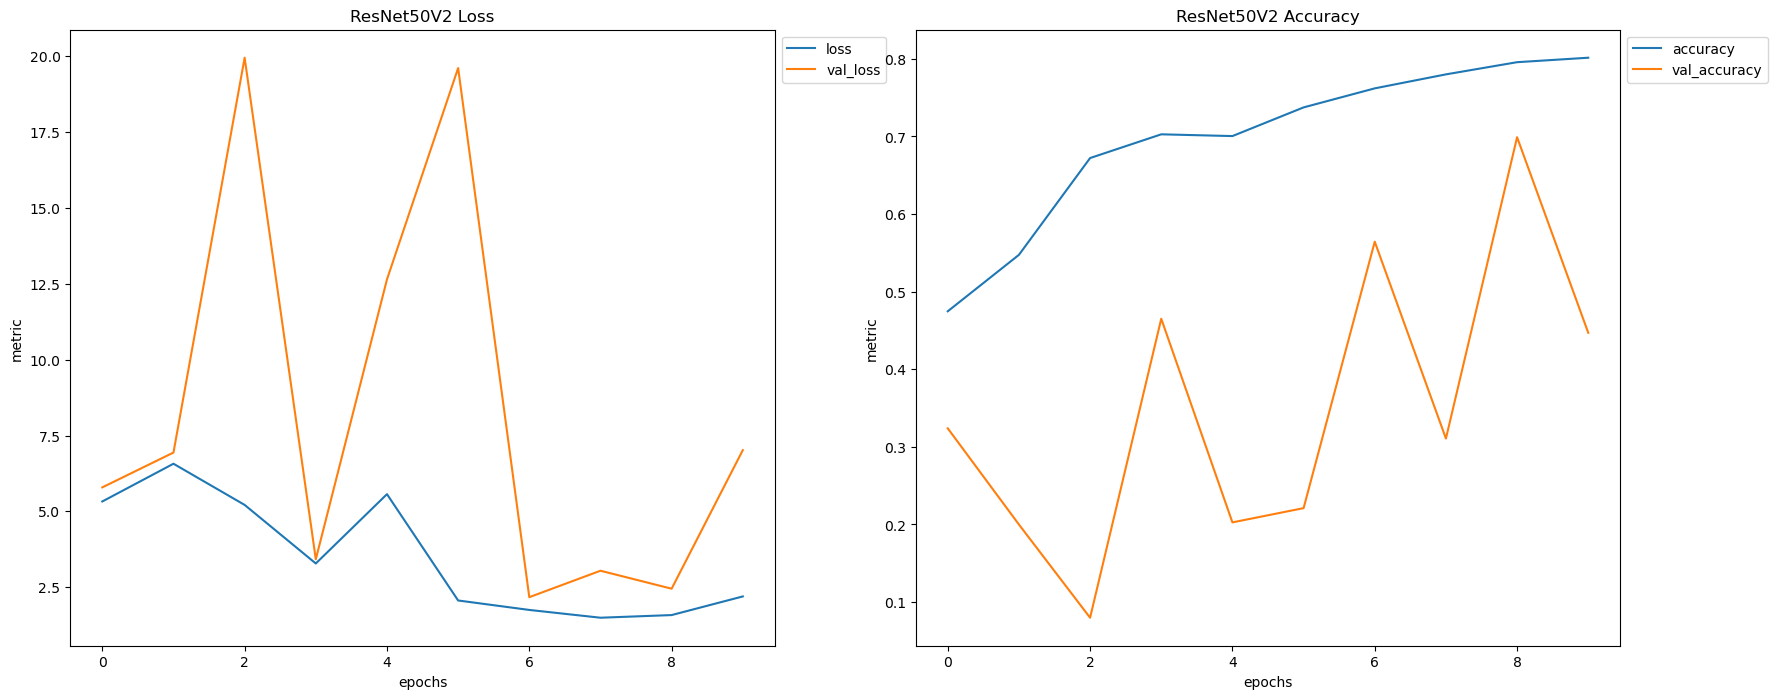

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_history(model_name, history, metrics):
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    sns.lineplot(data=history[metrics[0]], label=metrics[0], ax=axes[0])
    sns.lineplot(data=history[metrics[1]], label=metrics[1], ax=axes[0])
    axes[0].set_xlabel("epochs")
    axes[0].set_ylabel("metric")
    axes[0].legend(loc="upper left", bbox_to_anchor=(1, 1))
    axes[0].set_title(f"{model_name} Loss")

    sns.lineplot(data=history[metrics[2]], label=metrics[2], ax=axes[1])
    sns.lineplot(data=history[metrics[3]], label=metrics[3], ax=axes[1])
    axes[1].set_xlabel("epochs")
    axes[1].set_ylabel("metric")
    axes[1].legend(loc="upper left", bbox_to_anchor=(1, 1))
    axes[1].set_title(f"{model_name} Accuracy")

    plt.savefig(
        f"/home/t.afanasyeva/deep_learning_anaemias/output/{model_name}_history.png",
        bbox_inches="tight",
    )
    plt.show()
    plt.close()


# Iterate through the model history dictionaries and plot the losses and accuracies
for model_name, history_dict in {
    "EfficientNetB0": EfficientNetB0_history,
    "InceptionV3": InceptionV3_history,
    "MobileNetV2": MobileNetV2_history,
    "ResNet50V2": ResNet50V2_history,
}.items():
    plot_history(
        model_name,
        history_dict[model_name]["history"],
        ["loss", "val_loss", "accuracy", "val_accuracy"],
    )

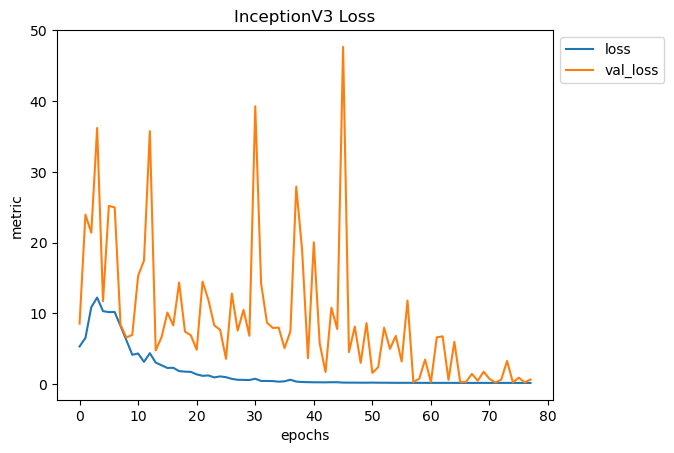

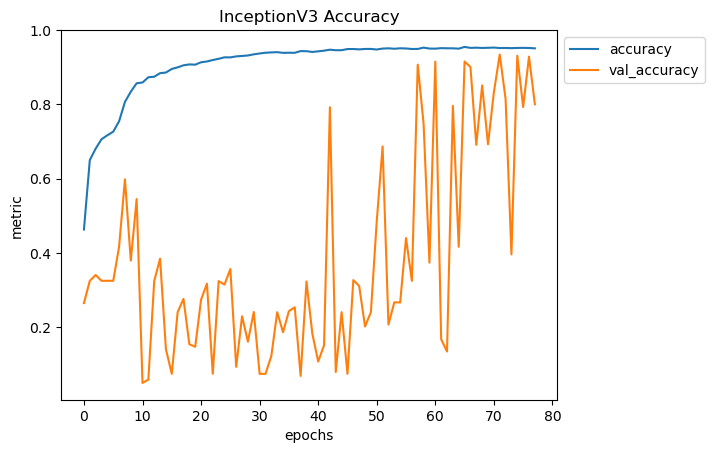

In [ ]:
plot_history(
    "EfficientNetB0",
    EfficientNetB0_history["EfficientNetB0"]["history"],
    ["loss", "val_loss"],
)
plot_history(
    "EfficientNetB0",
    EfficientNetB0_history["EfficientNetB0"]["history"],
    ["accuracy", "val_accuracy"],
)

plot_history(
    "MobileNetV2", MobileNetV2_history["MobileNetV2"]["history"], ["loss", "val_loss"]
)
plot_history(
    "MobileNetV2",
    MobileNetV2_history["MobileNetV2"]["history"],
    ["accuracy", "val_accuracy"],
)

plot_history(
    "ResNet50V2", ResNet50V2_history["ResNet50V2"]["history"], ["loss", "val_loss"]
)
plot_history(
    "ResNet50V2",
    ResNet50V2_history["ResNet50V2"]["history"],
    ["accuracy", "val_accuracy"],
)

plot_history(
    "InceptionV3", InceptionV3_history["InceptionV3"]["history"], ["loss", "val_loss"]
)
plot_history(
    "InceptionV3",
    InceptionV3_history["InceptionV3"]["history"],
    ["accuracy", "val_accuracy"],
)

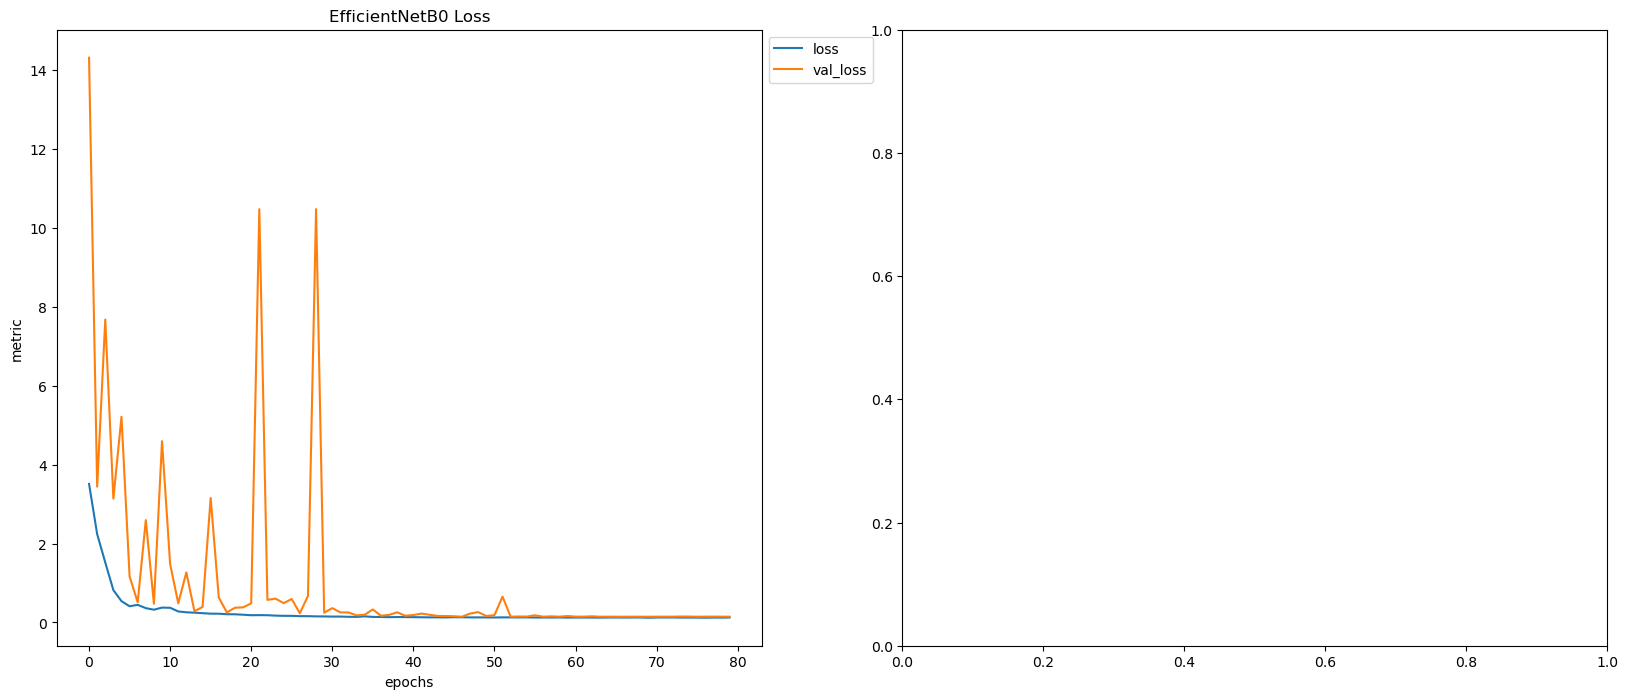

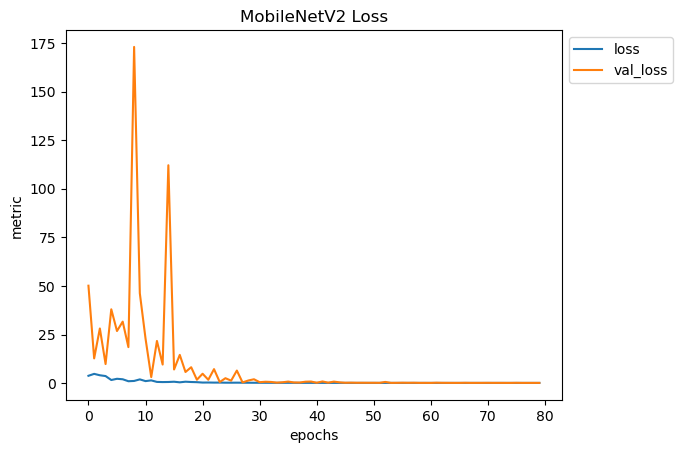

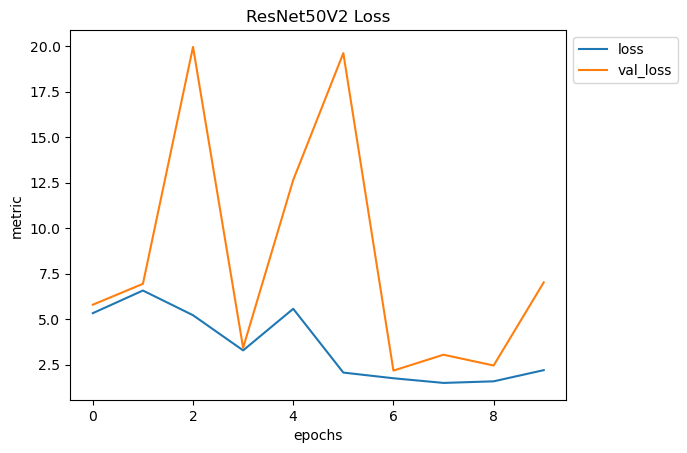

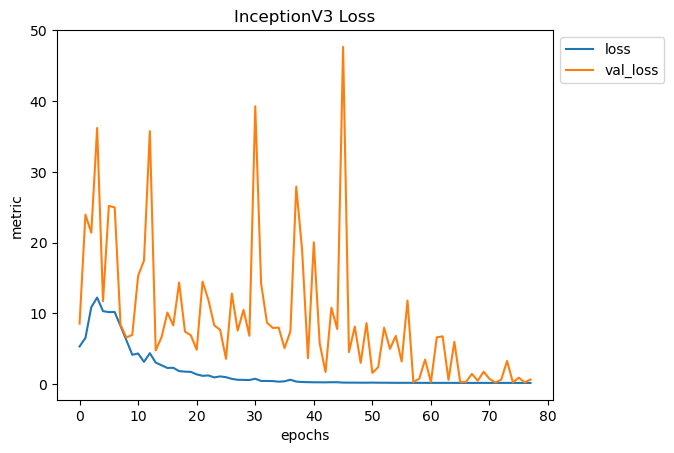

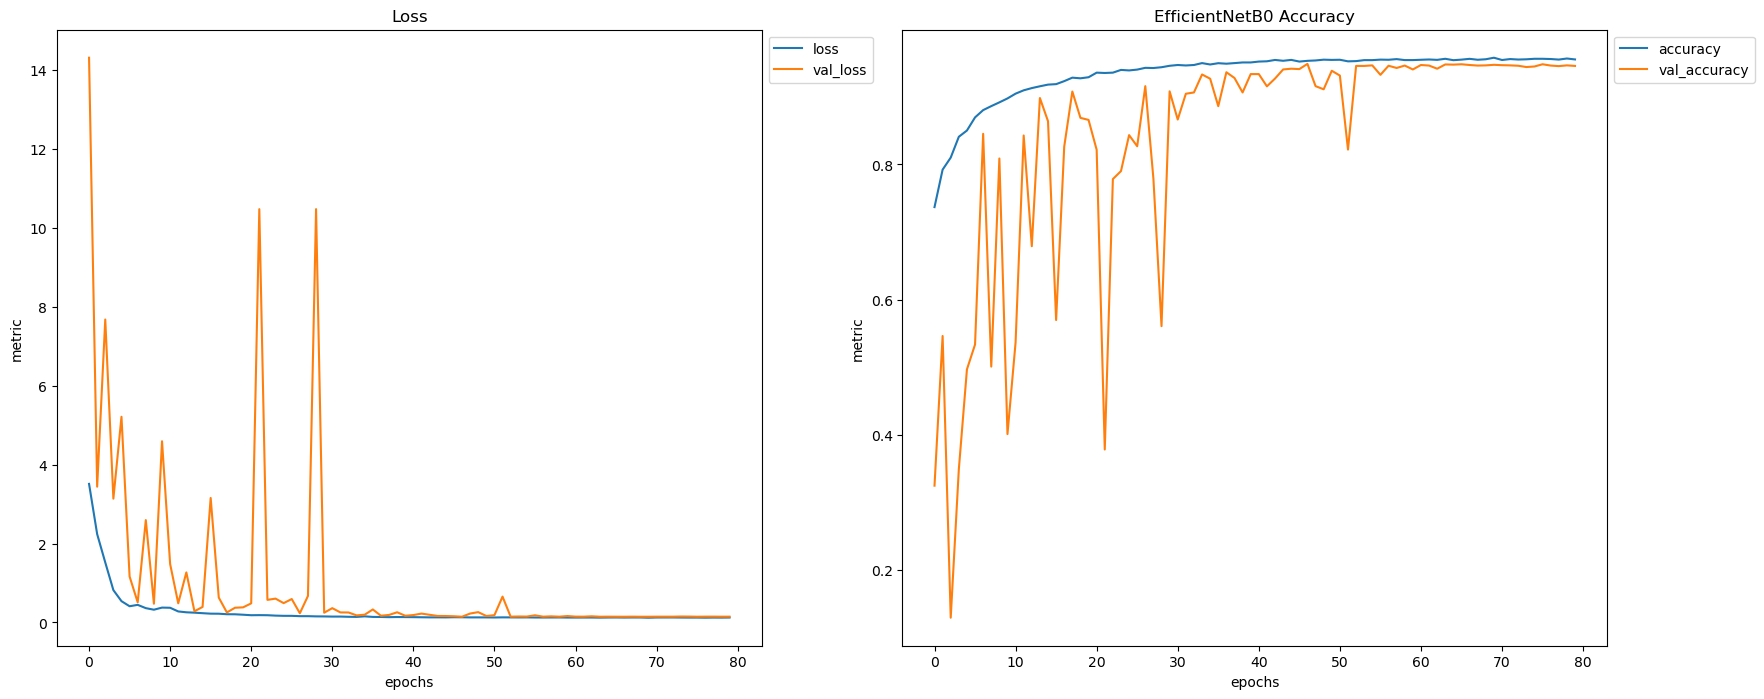

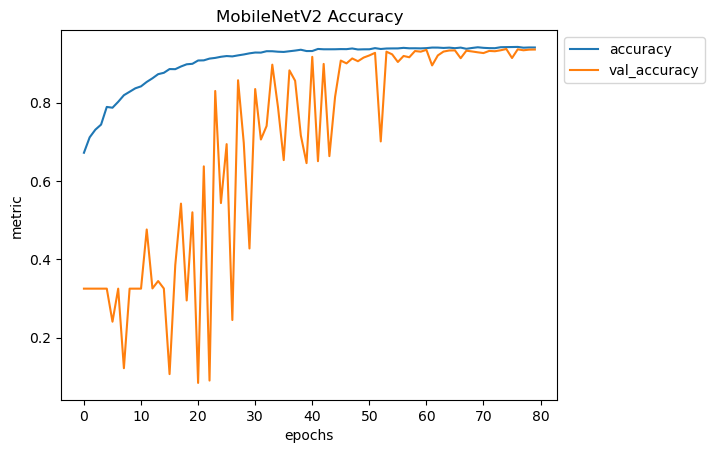

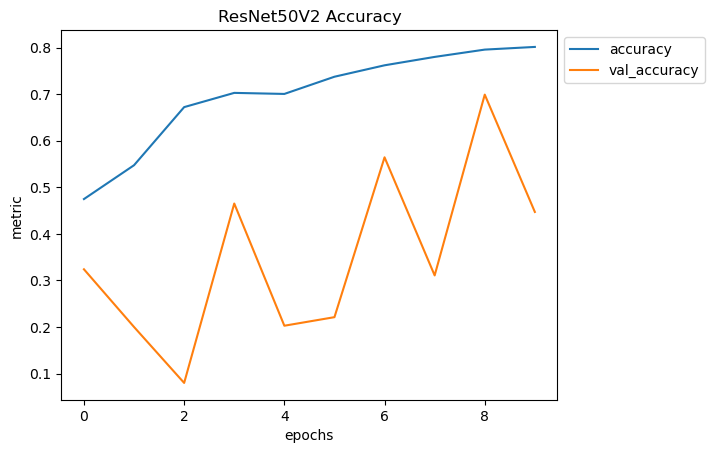

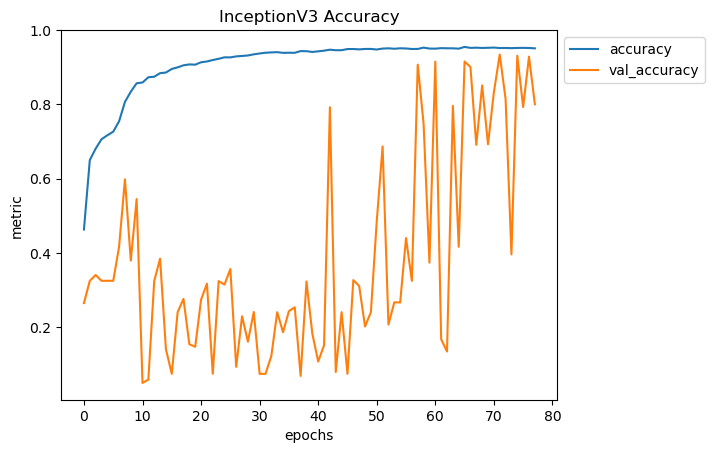

<Figure size 640x480 with 0 Axes>

In [6]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
)


def get_confusion_matrix(model_name, y_test, y_pred, class_names):

    _, ax = plt.subplots(figsize=(8, 8))
    cm = ConfusionMatrixDisplay.from_predictions(
        y_test,
        y_pred,
        ax=ax,
        xticks_rotation="vertical",
        colorbar=False,
        normalize="true",
        display_labels=class_names,
    )

    plt.rc("font", size=12)
    ax.set_title(f"Confusion Matrix {model_name}")
    plt.savefig(f"confusion_matrix_{model_name}.png")

In [7]:
from keras.models import Sequential
from keras import layers
from keras.layers import GlobalAveragePooling2D, Dense
from keras.applications.inception_v3 import (
    preprocess_input as inceptionV3_preprocess_input,
)

from keras.applications.resnet_v2 import preprocess_input as resnet50v2_preprocess_input
from keras.applications.mobilenet_v2 import (
    preprocess_input as mobilenetv2_preprocess_input,
)
from keras.applications.efficientnet import (
    preprocess_input as efficientnetb0_preprocess_input,
)

2025-02-08 12:28:30.884951: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-08 12:28:30.900697: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739014110.918524 2348468 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739014110.923878 2348468 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-08 12:28:30.942351: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [8]:
import tensorflow as tf

In [9]:
preprocess_input_dict = {
    "ResNet50V2": resnet50v2_preprocess_input,
    "MobileNetV2": mobilenetv2_preprocess_input,
    "EfficientNetB0": efficientnetb0_preprocess_input,
    "InceptionV3": inceptionV3_preprocess_input,
}
models_dict = {
    "ResNet50V2": tf.keras.applications.ResNet50V2,
    "MobileNetV2": tf.keras.applications.MobileNetV2,
    "EfficientNetB0": tf.keras.applications.EfficientNetB0,
}

# "InceptionV3": tf.keras.applications.InceptionV3,

In [10]:
from pathlib import Path

path_in = Path.cwd().parent / "resources/imagestream"

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("font", size=14)
plt.rc("axes", labelsize=14, titlesize=14)
plt.rc("legend", fontsize=14)
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)

In [39]:
import numpy as np
from tensorflow import keras

In [37]:
AUTOTUNE = tf.data.AUTOTUNE
IMG_SIZE = 224

test_ds = tf.keras.utils.image_dataset_from_directory(
    path_in,
    labels="inferred",
    label_mode="categorical",
    class_names=[
        "discocyte",
        "sidewaydiscocytes",
        "holly_leaf",
        "granular",
        "sickle",
        "echinocyte",
    ],
    color_mode="grayscale",
    batch_size=None,
    image_size=(IMG_SIZE, IMG_SIZE),
    shuffle=True,
    seed=93,
    validation_split=0.2,
    subset="validation",
    verbose=True,
)

class_names = test_ds.class_names
rgb_test_ds = test_ds.map(
    lambda x, y: (tf.image.grayscale_to_rgb(x), y), num_parallel_calls=AUTOTUNE
)

Found 18237 files belonging to 6 classes.
Using 3647 files for validation.


In [38]:
    for _,y in test_ds.take(1):
        print(y)

tf.Tensor([0. 1. 0. 0. 0. 0.], shape=(6,), dtype=float32)


Predicitng ResNet50V2...
114/114 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step
Predicitng MobileNetV2...
114/114 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step
Predicitng EfficientNetB0...
114/114 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step


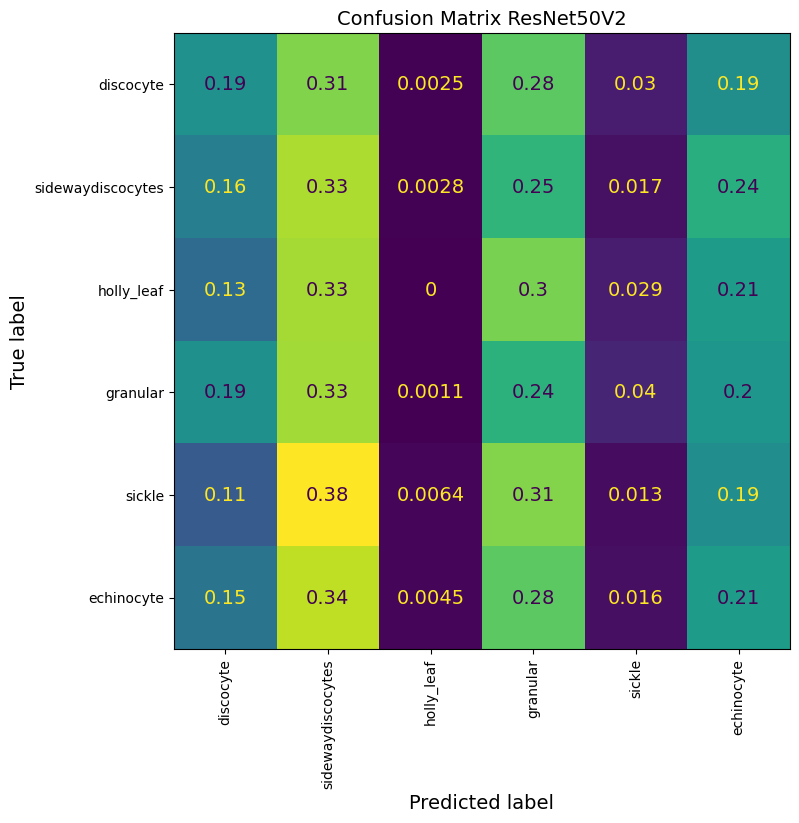

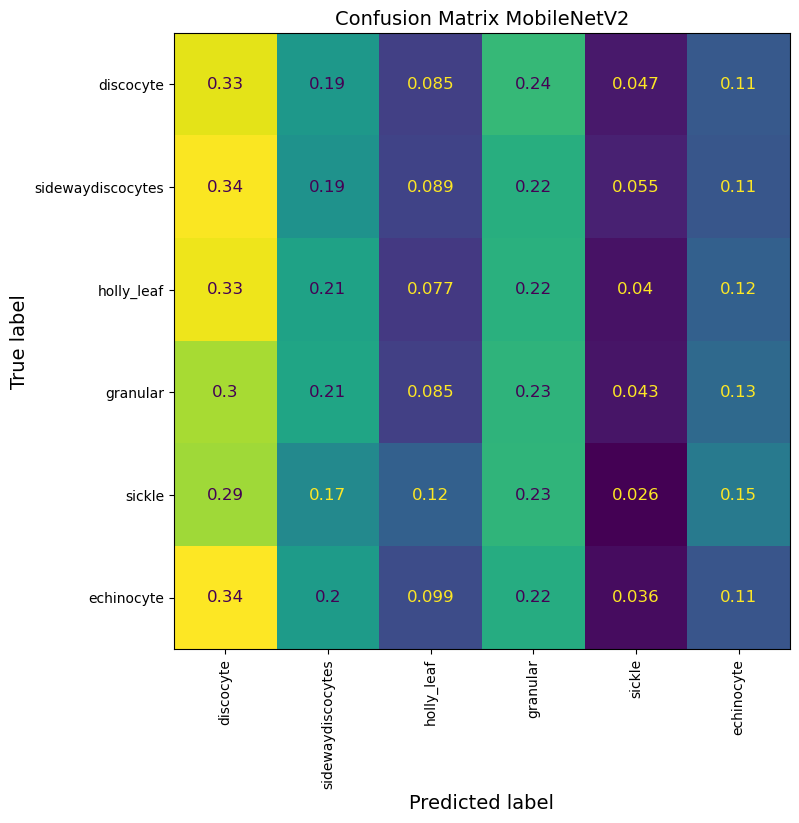

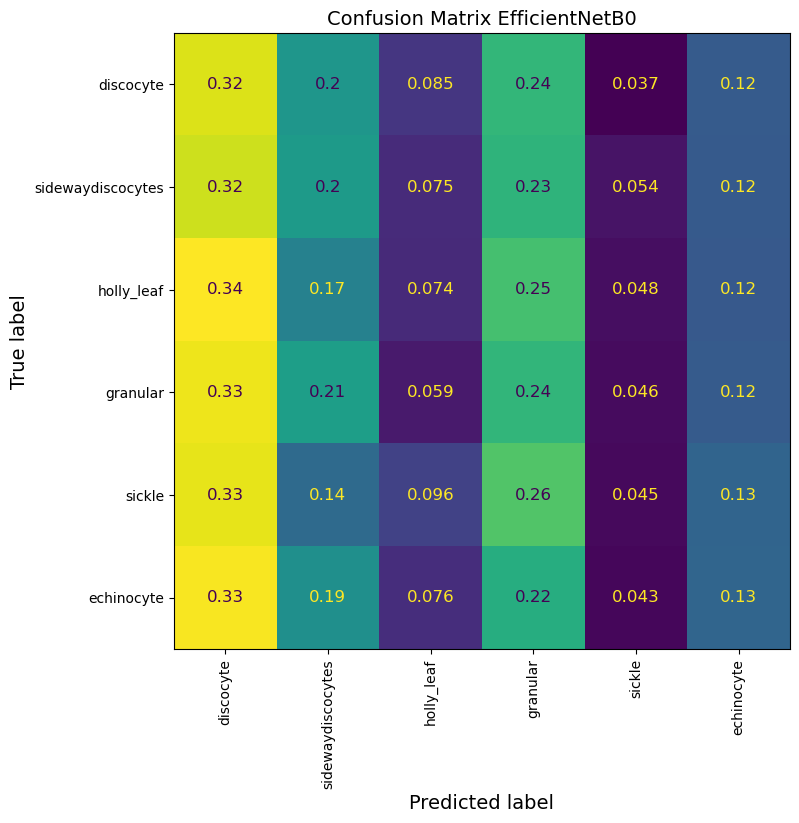

In [ ]:
for model_name, model_class in models_dict.items():
    print(f"Predicitng {model_name}...")
    model = tf.keras.models.load_model(
        f"/home/t.afanasyeva/deep_learning_anaemias/output/250205_{model_name}.keras"
    )
    # model.summary()
    preprocess_input = preprocess_input_dict[model_name]
    test_ds = (
        rgb_test_ds.map(
            lambda x, y: (preprocess_input(x), y), num_parallel_calls=AUTOTUNE
        )
        .batch(32)
        .prefetch(AUTOTUNE)
    )

    y_test = tf.concat([y for _, y in test_ds], axis=0)
    y_test = np.argmax(y_test, axis=1)
    y_pred = model.predict(test_ds)
    y_pred = y_pred.argmax(axis=1)
    get_confusion_matrix(model_name, y_test, y_pred, class_names)

In [50]:
y_pred

array([3, 3, 0, ..., 3, 1, 0])